## Data Description

This dataset contains information about used cars.
This data can be used for a lot of purposes such as price prediction to exemplify the use of machine learning regression models.
The columns in the given dataset are as follows:

- name
- year
- selling_price
- km_driven
- fuel
- seller_type
- transmission
- Owner
- mileage
- engine 
- max_power
- torque
- seats

-> Our target variable is selling_price, which is a numerical outcome.

In [71]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from datetime import date
from sklearn.model_selection import GridSearchCV

#set seaborn style as default style
sns.set()

import warnings
warnings.simplefilter("ignore")

In [2]:
# import the data using pandas 
data = pd.read_csv('Car details v3.csv', sep=',')

In [3]:
# show the data
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


## EDA part

In [4]:
# the shape of our data
data.shape

(8128, 13)

In [5]:
# how many there are of each data type
data.dtypes.value_counts()

object     9
int64      3
float64    1
dtype: int64

In [6]:
# sum of null value for each column
data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [7]:
# sum of null value
data.isnull().sum().sum()

1100

In [8]:
# summary of statistics
data.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [9]:
# show the number of duplicated rows
duplicated = data[data.duplicated(keep='first')]
len(duplicated)

1202

In [10]:
# get indexes of duplicated rows
index_duplicated = duplicated.index
# drop the duplicated rows
data = data.drop(index_duplicated , axis=0)

In [11]:
# check for duplicated rows
len(data[data.duplicated(keep='first')])

0

In [12]:
# handling missing data
data.dropna(inplace=True, axis=0, how='any')

In [13]:
# verify sum of null value
data.isnull().sum().sum()

0

In [14]:
# drop the unimportant columns
data = data.drop(['torque'] , axis=1)
data = data.drop(['name'] , axis=1)

In [15]:
#convert some categoricol column to numerical by deleting a suffix

data['mileage'] = data['mileage'].str.replace(r'\D', '')
data['engine'] = data['engine'].str.replace(r'\D', '')
data['max_power'] = data['max_power'].str.replace(r'\D', '')

data['mileage'] = pd.to_numeric(data['mileage'])
data['engine'] = pd.to_numeric(data['engine'])
data['max_power'] = pd.to_numeric(data['max_power'])

In [16]:
# check how many there are of each data type
data.dtypes.value_counts()

int64      6
object     4
float64    1
dtype: int64

In [17]:
# check the data
data

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,234,1248,74,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,2114,1498,10352,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,177,1497,78,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,230,1396,90,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,161,1298,882,5.0
...,...,...,...,...,...,...,...,...,...,...,...
8121,2013,260000,50000,Petrol,Individual,Manual,Second Owner,189,998,671,5.0
8122,2014,475000,80000,Diesel,Individual,Manual,Second Owner,2254,1396,8873,5.0
8123,2013,320000,110000,Petrol,Individual,Manual,First Owner,185,1197,8285,5.0
8124,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,168,1493,110,5.0


In [18]:
# reset the indexes of this data frame
data = data.reset_index(drop=True)
data

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,234,1248,74,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,2114,1498,10352,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,177,1497,78,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,230,1396,90,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,161,1298,882,5.0
...,...,...,...,...,...,...,...,...,...,...,...
6712,2013,260000,50000,Petrol,Individual,Manual,Second Owner,189,998,671,5.0
6713,2014,475000,80000,Diesel,Individual,Manual,Second Owner,2254,1396,8873,5.0
6714,2013,320000,110000,Petrol,Individual,Manual,First Owner,185,1197,8285,5.0
6715,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,168,1493,110,5.0


In [20]:
# we create a new features by using this features to extract valuable information
current_year = date.today().year
data['car_age']= current_year - data['year']

In [23]:
#Dropping unnecessary columns from Dataset
data.drop(columns=['year'],inplace=True)

In [24]:
# check the data
data

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_age
0,450000,145500,Diesel,Individual,Manual,First Owner,234,1248,74,5.0,8
1,370000,120000,Diesel,Individual,Manual,Second Owner,2114,1498,10352,5.0,8
2,158000,140000,Petrol,Individual,Manual,Third Owner,177,1497,78,5.0,16
3,225000,127000,Diesel,Individual,Manual,First Owner,230,1396,90,5.0,12
4,130000,120000,Petrol,Individual,Manual,First Owner,161,1298,882,5.0,15
...,...,...,...,...,...,...,...,...,...,...,...
6712,260000,50000,Petrol,Individual,Manual,Second Owner,189,998,671,5.0,9
6713,475000,80000,Diesel,Individual,Manual,Second Owner,2254,1396,8873,5.0,8
6714,320000,110000,Petrol,Individual,Manual,First Owner,185,1197,8285,5.0,9
6715,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,168,1493,110,5.0,15


In [25]:
#checking unique values for the categorical data
print(data["fuel"].unique())
print(data["seller_type"].unique())
print(data["transmission"].unique())
print(data["owner"].unique())

['Diesel' 'Petrol' 'LPG' 'CNG']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']


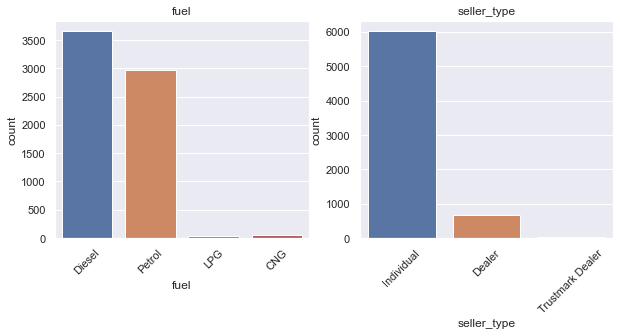

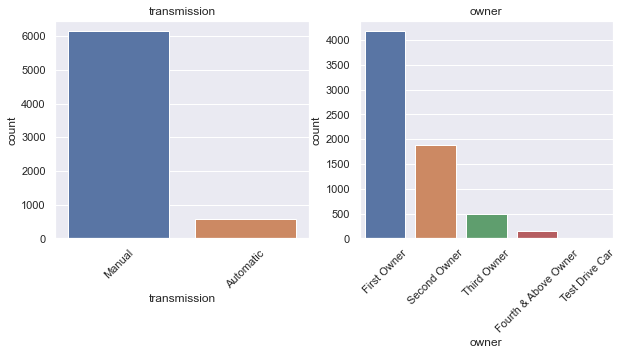

In [26]:
# select the categorical columns and show each one of it in count plot
categorical_columns=['fuel', 'seller_type', 'transmission', 'owner']
i=0
while i<4:
    fig=plt.figure(figsize=[10,4])
    ax1=fig.add_subplot(121)
    ax2=fig.add_subplot(122)
    
    ax1.title.set_text(categorical_columns[i])
    plt.subplot(1,2,1)
    sns.countplot(x=categorical_columns[i], data=data)
    i+=1
    plt.xticks(rotation = 45)
    
    ax2.title.set_text(categorical_columns[i])
    plt.subplot(1,2,2)
    sns.countplot(x=categorical_columns[i], data=data)
    i+=1
    plt.xticks(rotation = 45)
    plt.show()

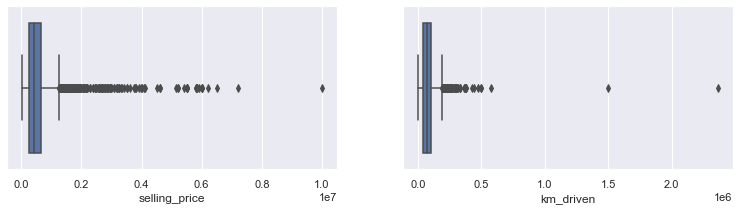

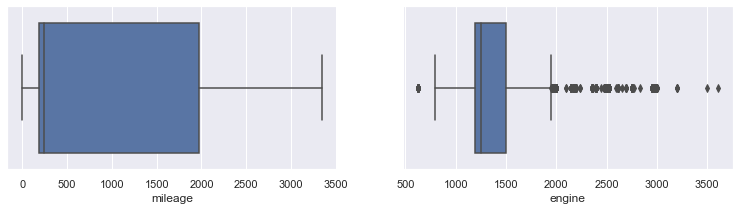

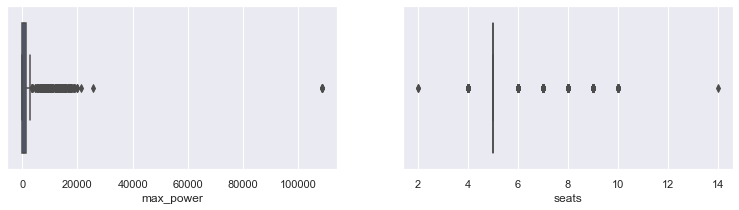

In [27]:
# select the numericale columns and show each one of it in box plot
numerical_columns = ['selling_price','km_driven','mileage','engine','max_power','seats']
i=0
while i < 6:
    fig = plt.figure(figsize=[13,3])
    #ax1 = fig.add_subplot(121)
    #ax2 = fig.add_subplot(122)
    
    #ax1.title.set_text(num_cols[i])
    plt.subplot(1,2,1)
    sns.boxplot(x=numerical_columns[i], data=data)
    i += 1
    
    #ax2.title.set_text(num_cols[i])
    plt.subplot(1,2,2)
    sns.boxplot(x=numerical_columns[i], data=data)
    i += 1
    
    plt.show()


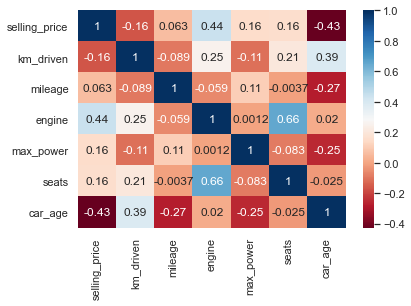

In [28]:
#Bivariate and Multi-Variate Analysis
sns.heatmap(data.corr(), annot=True, cmap='RdBu')
plt.show()

## Data Preprocessing

In [29]:
# convert categorical columns to numerical using one hot encoding because there is No oridinal data 
for feature in list(['fuel','seller_type','transmission','owner']):
    le = LabelEncoder()
    le.fit(data[feature])
    data[feature] = le.transform(data[feature])

In [30]:
# check the data
data

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_age
0,450000,145500,1,1,1,0,234,1248,74,5.0,8
1,370000,120000,1,1,1,2,2114,1498,10352,5.0,8
2,158000,140000,3,1,1,4,177,1497,78,5.0,16
3,225000,127000,1,1,1,0,230,1396,90,5.0,12
4,130000,120000,3,1,1,0,161,1298,882,5.0,15
...,...,...,...,...,...,...,...,...,...,...,...
6712,260000,50000,3,1,1,2,189,998,671,5.0,9
6713,475000,80000,1,1,1,2,2254,1396,8873,5.0,8
6714,320000,110000,3,1,1,0,185,1197,8285,5.0,9
6715,135000,119000,1,1,1,1,168,1493,110,5.0,15


- #### handling outliers by using IQR rule

   1.  First, we will calculate the Interquartile Range of the data (IQR = Q3 — Q1). Later, we will determine our outlier boundaries with IQR.

2. We will get our lower boundary with this calculation Q1–1.5 * IQR. We will get our upper boundary with this calculation Q3 + 1.5 * IQR.

3. With the describe method of pandas, we can see our data’s Q1 (%25) and Q3 (%75) percentiles. We can calculate our IQR point and boundaries (with 1.5).

In [31]:
# implementation
def IQR(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    result_ = pd.Series([0] * len(column))
    result_[((column < lower_limit) | (column > upper_limit))] = 1
    return result_

In [32]:
# after this, let's check the number of outliers for each numerical variable & turn them into nan values(for easy processing)
outliers_nb = dict()
for feature in list(numerical_columns):
    # for each feature do this code
    outliers_nb[feature] = IQR(data[feature]).value_counts()[0]
    # get the list of "1"(outliers) indexes 
    indexes = IQR(data[feature])[IQR(data[feature])==1].index.tolist()
    # replace all values matching the given indexes with NaN
    data.loc[indexes,feature] = np.nan

In [33]:
# check results
outliers_nb

{'selling_price': 6411,
 'km_driven': 6556,
 'mileage': 6717,
 'engine': 5510,
 'max_power': 5154,
 'seats': 5254}

In [34]:
#check for null values
data.isnull().sum()

selling_price     306
km_driven         161
fuel                0
seller_type         0
transmission        0
owner               0
mileage             0
engine           1207
max_power        1563
seats            1463
car_age             0
dtype: int64

In [35]:
data.shape

(6717, 11)

In [36]:
# We will take the simple approach and delete outliers(as the max number 2545 represents only 4% of all data)
data.dropna(inplace=True)

In [37]:
# reset the indexes of this data frame
data = data.reset_index(drop=True)

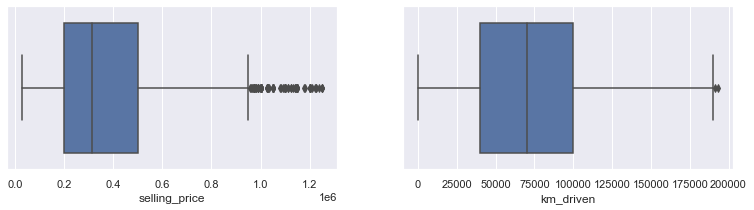

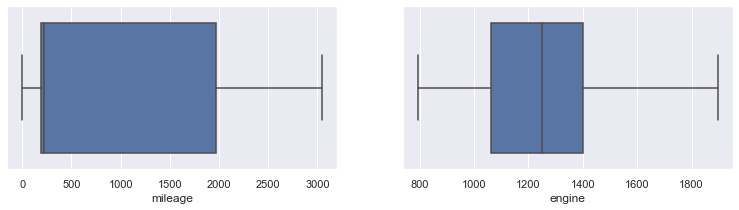

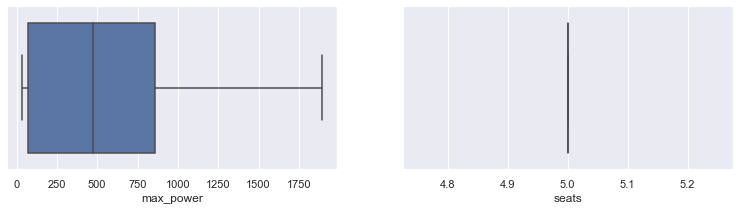

In [38]:
# box ploting
numerical_columns = ['selling_price','km_driven','mileage','engine','max_power','seats']
i=0
while i < 6:
    fig = plt.figure(figsize=[13,3])
    plt.subplot(1,2,1)
    sns.boxplot(x=numerical_columns[i], data=data)
    i += 1
    
    plt.subplot(1,2,2)
    sns.boxplot(x=numerical_columns[i], data=data)
    i += 1
    
    plt.show()

In [52]:
# Splitting dataset to input & output
X = data.drop(['selling_price'],axis=1)
Y = data['selling_price']

In [53]:
# Splitting dataset int otrain and test subsets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25,random_state=42)

In [54]:
# Creating LinearRegression model (Evaluation)
lr = LinearRegression()
lr.fit(x_train, y_train)
y_Train_pred_lr = lr.predict(x_train)
R2_lr = metrics.r2_score(y_train,y_Train_pred_lr)
print('r2_score = ', R2_lr)

r2_score =  0.7109204748973188


In [55]:
y_test_pred_lr = lr.predict(x_test)
R2_Test_lr = metrics.r2_score(y_test,y_test_pred_lr)
print('r2_score = ', R2_Test_lr)

r2_score =  0.7078276893974096


- ##### define our pipeline

In [56]:
l_pipeline = Pipeline([ ('lr',LinearRegression()) ])

In [57]:
# launch the model
l_pipeline.fit(x_train,y_train)
    # score
l_pipeline.score(x_test,y_test)

0.7078276893974096

In [58]:
# import package
from sklearn.model_selection import cross_val_score
# Launch the model
scores = cross_val_score(l_pipeline, x_train, y_train, cv=10, scoring='r2')

In [59]:
# view final score(mean)
np.mean(scores)

0.7045807677907275

- ##### adding PolynomialFeatures and StandardScaler

In [65]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
pf = PolynomialFeatures(degree=3)
spl_pipeline = Pipeline([
 ('std_scaler', StandardScaler()),
 ('p_features',pf),
 ('lr',LinearRegression())
 ])

In [66]:
# launch the model again
spl_pipeline.fit(x_train,y_train)
# score
spl_pipeline.score(x_test,y_test)

0.8195807817699573

In [67]:
# score for training data
spl_pipeline.score(x_train,y_train)

0.8672518703094871

- ##### Using Cross-Validation

In [68]:
scores = cross_val_score(spl_pipeline, x_train, y_train, cv=5, scoring='r2')

In [69]:
# view final score
scores

array([-1.28703992e+18,  8.06762623e-01, -3.11484527e+19, -7.67322929e+16,
       -2.21815862e+18])

- ##### Using Lasso Regression

In [72]:
# define a new pipeline for Lasso 

lasso_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('polynomial_features',PolynomialFeatures()),
    ('lasso_regression',Lasso())
])

# define the combination of hyperparameters
params = {
    'polynomial_features__degree': [1, 2, 3],
    'lasso_regression__alpha': np.geomspace(1e-5, 1e5, num=30)
}

# define the gridsearch
grid = GridSearchCV(lasso_pipeline, params, cv=10)

In [73]:
grid.fit(x_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('polynomial_features',
                                        PolynomialFeatures()),
                                       ('lasso_regression', Lasso())]),
             param_grid={'lasso_regression__alpha': array([1.00000000e-05, 2.21221629e-05, 4.89390092e-05, 1.08263673e-04,
       2.39502662e-04, 5.29831691e-04, 1.17210230e-03, 2.59294380e-03,
       5.73615251e-03, 1.26896100e-02, 2.80721620e-02, 6.21016942e-02,
       1.37382380e-01, 3.03919538e-01, 6.72335754e-01, 1.48735211e+00,
       3.29034456e+00, 7.27895384e+00, 1.61026203e+01, 3.56224789e+01,
       7.88046282e+01, 1.74332882e+02, 3.85662042e+02, 8.53167852e+02,
       1.88739182e+03, 4.17531894e+03, 9.23670857e+03, 2.04335972e+04,
       4.52035366e+04, 1.00000000e+05]),
                         'polynomial_features__degree': [1, 2, 3]})

In [75]:
# show scores and best params
grid.best_score_, grid.best_params_

(0.8294058684758973,
 {'lasso_regression__alpha': 385.6620421163472,
  'polynomial_features__degree': 3})

In [76]:
# review the r2-score
y_pred_lasso  = grid.predict(x_test)
r2_score(y_pred_lasso, y_test)

0.8077633164056922

- ##### Using Ridge Regression

In [77]:
# define a new pipeline for Ridge Reg
ridge_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('polynomial_features', PolynomialFeatures()),
    ('ridge_regression', Ridge())
])

# define the combination of hyperparameters
params = {
    'polynomial_features__degree': [1, 2, 3],
    'ridge_regression__alpha': np.geomspace(1e-5, 1e5, num=30)
}

# define the gridsearch
grid = GridSearchCV(ridge_pipeline, params, cv=10)

In [78]:
# Launch our model
grid.fit(x_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('polynomial_features',
                                        PolynomialFeatures()),
                                       ('ridge_regression', Ridge())]),
             param_grid={'polynomial_features__degree': [1, 2, 3],
                         'ridge_regression__alpha': array([1.00000000e-05, 2.21221629e-05, 4.89390092e-05, 1.08263673e-04,
       2.39502662e-04, 5.29831691e-04, 1.17210230e-03, 2.59294380e-03,
       5.73615251e-03, 1.26896100e-02, 2.80721620e-02, 6.21016942e-02,
       1.37382380e-01, 3.03919538e-01, 6.72335754e-01, 1.48735211e+00,
       3.29034456e+00, 7.27895384e+00, 1.61026203e+01, 3.56224789e+01,
       7.88046282e+01, 1.74332882e+02, 3.85662042e+02, 8.53167852e+02,
       1.88739182e+03, 4.17531894e+03, 9.23670857e+03, 2.04335972e+04,
       4.52035366e+04, 1.00000000e+05])})

In [79]:
# show scores and best params
grid.best_score_, grid.best_params_

(0.8199785854325958,
 {'polynomial_features__degree': 2,
  'ridge_regression__alpha': 16.102620275609425})

In [80]:
# review the r2-score
y_pred_ridge  = grid.predict(x_test)
r2_score(y_pred_ridge, y_test)

0.7824229426818204

- ##### The Score of Linear Regression Model is 0.81
- ##### The Score of Lasso Regression Model is 0.82
- ##### The Score of Ridge Regression Model is 0.81

 ### the accuracy of model is 0.82 which shows that lasso is also giving good results for this model.